# Titanic Tutorial by ash316 - 1st Try

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# plot style 설정
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Exploratory Data Analysis (EDA)

In [2]:
# 데이터 로드
data = pd.read_csv('../data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# null data 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**, **Cabin**, **Embarked**에 null value가 있다는 것을 알 수 있다.

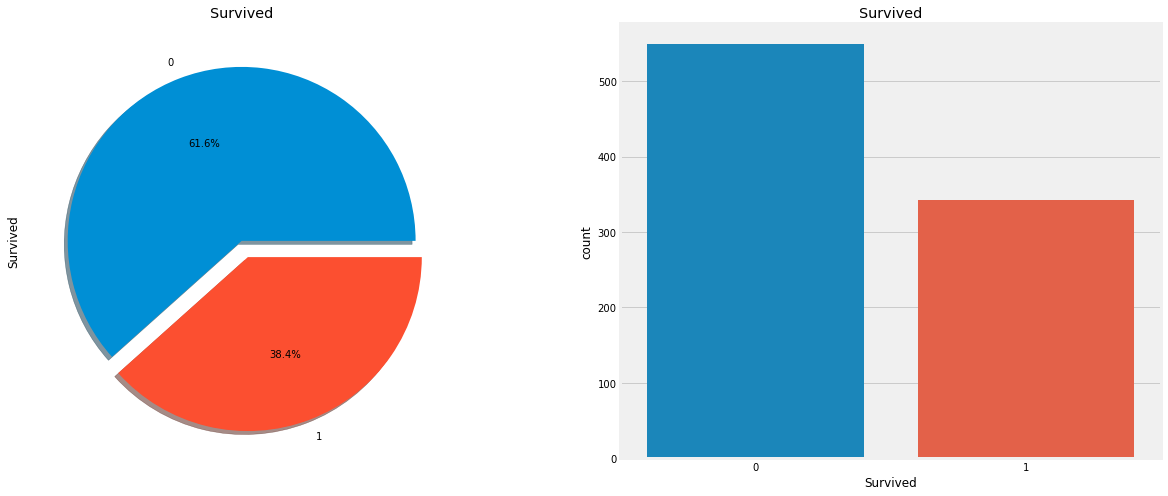

In [4]:
f, ax = plt.subplots(1, 2, figsize=(19, 8))

# figure 1. 생존자/사망자를 pie plot으로
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[1].set_ylabel('')

# figure 2. 생존자/사망자를 count plot으로
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

생존자/사망자 비율을 보면 사망자가 많다는 것을 알 수 있다. 약 **38.4%**만이 타이타닉에서 생존을 했다.

> `💡 TIP` Feature의 종류   
> - **categorical feature** : 두 개 이상의 카테고리를 갖고 각 value로 카테고리화가 가능한 피처 (하지만 순서를 매길 수 없음)
>    - `ex.` Sex, Embarked
> - **ordinal feature** : categorical feature와 비슷하지만 순서가 있는 혹은 정렬이 가능한 피처
>    - `ex.` Pclass
> - **continuous feature** : value가 어떤 두 값 사이의 한 부분인 피처
>    - `ex.` Age

### 1.1. Analysis of the features
#### 1.1.1. Sex - Categorical Feature

In [5]:
# sex와 survived를 기준으로 grouping
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

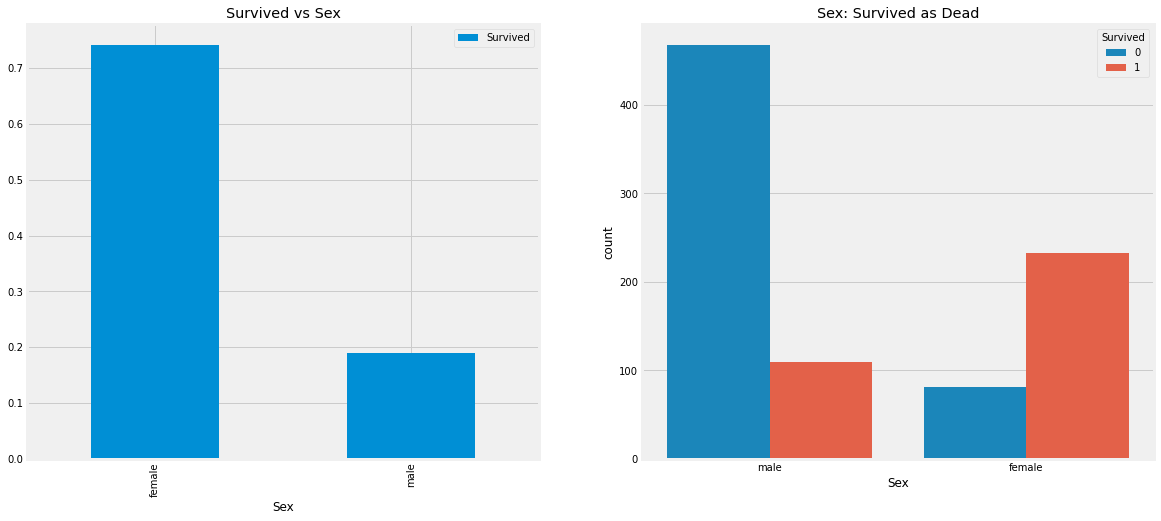

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# sex를 기준으로 grouping하여 생존율 평균을 계산
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# sex별 생존자/사망자 비교
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived as Dead')

plt.show()

배에 탄 남성이 여성보다는 많지만, **여자의 생존률이 남자보다 높다**는 걸 알 수 있다.

여성의 생존률은 **75%**지만, 남성의 생존률은 **18, 19%**이다.

#### 1.1.2. Pclass - Ordinal Feature

In [8]:
# pclass와 생존률과의 관계
pd.crosstab(data.Pclass, data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


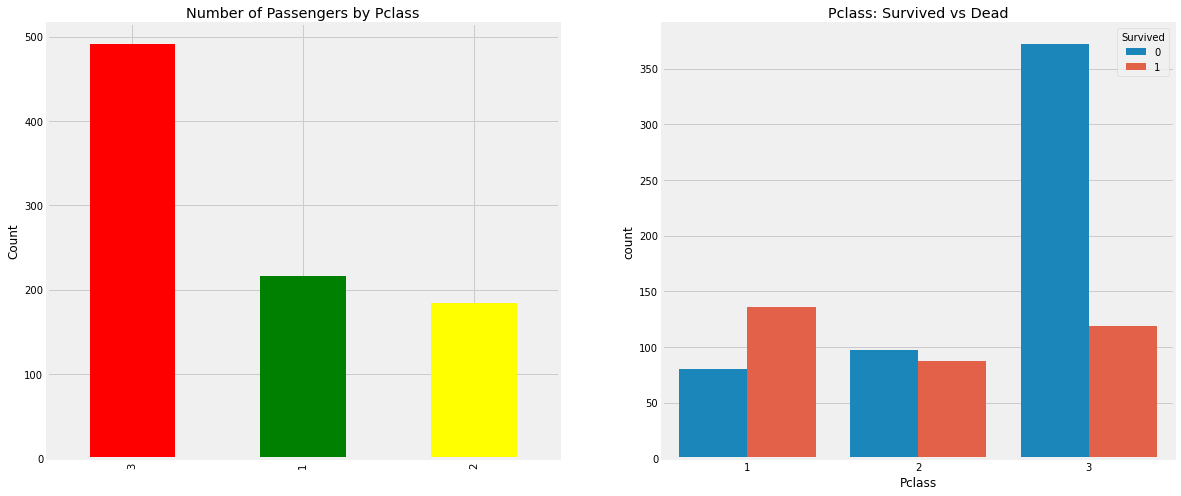

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# 각 class별 생존자 수
data['Pclass'].value_counts().plot.bar(color=['red','green','yellow'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

# 각 class별 생존자/사망자 수
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

*돈이 모든 것을 살 수 없다*지만, 위의 그래프에 보이다 싶이 **Pclass 1의 승선자들이 생존률이 높고, 승선자가 많은 Pclass 3의 승선자들의 생존률이 낮은 것**을 볼 수 있다.

Pclass 1의 생존률은 **63%**, Pclass 2의 생존률은 **48%** 이다.

#### 1.1.3. Sex and Pclass

In [10]:
# sex와 pclass를 survived의 관계를 한 번에
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

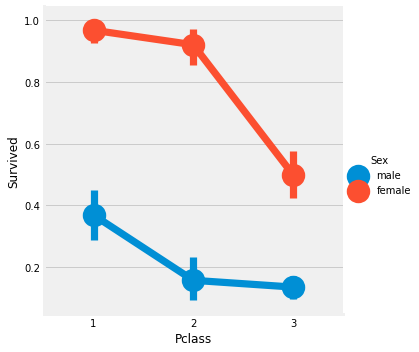

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Factorplot과 CrossTab에서 보이듯이 **Pclass 1의 여성의 생존률은 95, 96%**임을 알 수 있다.
또한 Pclass와 무관하게 **여성이 구조 시 가장 높은 우선 순위를 가졌다**는 것을 알 수 있다. Pclass 1의 남성이라도 낮은 생존률을 보였다.

그러므로 우리는 **Pclass를 중요한 피처**라고 생각할 수 있다.

### 1.2. Finding relations or trends

## 2. Feature Engineering and Data Cleaning
### 2.1. Adding any few features
### 2.2. Removing redundant features
### 2.3. Converting features into suitable form

## 3. Predictive Modeling
### 3.1. Running Basic Algorithms
### 3.2. Cross Validation
### 3.3. Ensembling
### 3.4. Important Features Extraction